In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore 

In [3]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])

In [8]:
df=pd.DataFrame(data,columns=['Values'])
print(df.head())

      Values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466


***Scatter Plot***

**<ins> scatter plot helps visually identify extreme values.</ins>**

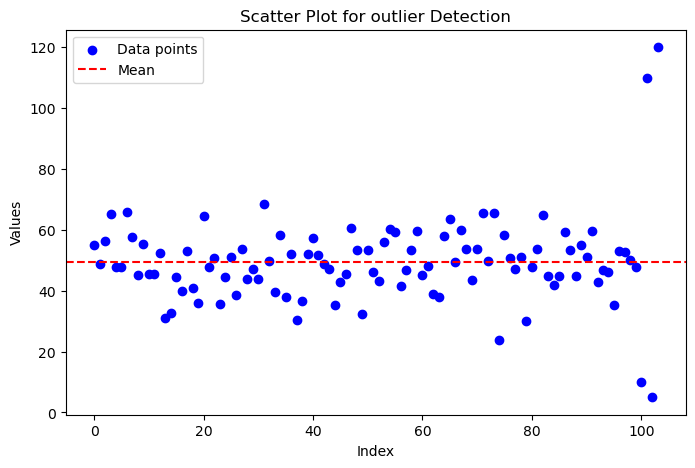

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color='blue',label='Data points')
plt.axhline(y=df['Values'].mean(),color='red',linestyle='--',label='Mean')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Scatter Plot for outlier Detection")
plt.legend()
plt.show()

***Box Plot***

**<ins>A box plot is useful for spotting extreme values using quartiles</ins>**

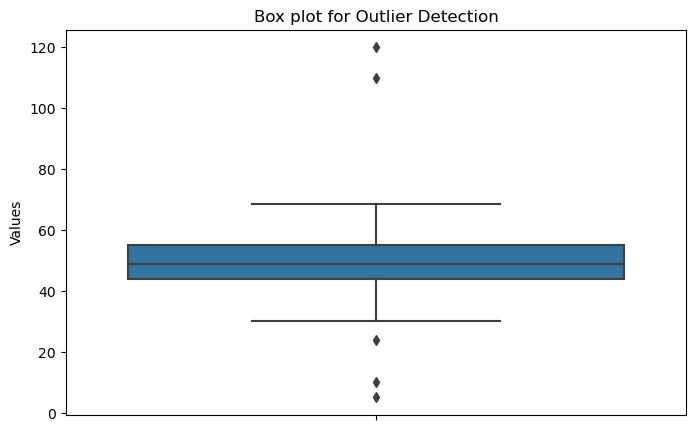

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y='Values')
plt.title("Box plot for Outlier Detection")
plt.show()

***Z-Score Method***

The Z-Score formula is
    
z = (x-μ)/σ

Where

X=Data point

μ=Mean of the dataset

σ=Standard Deviation

Steps:

1.Compute the Z-Score for each data point

2.if Z-Score values with Z>3 or Z<-3 are outliers

In [15]:
df['Z-score']=zscore(df['Values'])
df['Outlier_Z']=df['Z-score'].apply(lambda x: 'Outlier' if abs(x)>3 else 'Normal')
print(df[df['Outlier_Z']=='Outlier'])

     Values   Z-score Outlier_Z
101   110.0  4.328173   Outlier
102     5.0 -3.175368   Outlier
103   120.0  5.042796   Outlier


***Interquartile Range (IQR) Method***

IQR=Q3-Q1

Steps:
1.Calculate Q1(25th percentile) and Q3(75th percentile)

2.Compute IQR=Q3-Q1

3.Define lower & upper bounds:

    **Lower Bound=Q1-1.5*IQR**
    
    **Upper ound=Q3+1.5*IQR **
 
4.Any value outside these bounds is an outlier.

In [17]:
Q1=df['Values'].quantile(0.25)
Q3=df['Values'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df['Outlier_IQR']=df['Values'].apply(lambda x: 'Outlier' if(x < lower_bound or x> upper_bound) else 'Normal')
print(df[df['Outlier_IQR']=='Outlier'])


         Values   Z-score Outlier_Z Outlier_IQR
74    23.802549 -1.831694    Normal     Outlier
100   10.000000 -2.818056    Normal     Outlier
101  110.000000  4.328173   Outlier     Outlier
102    5.000000 -3.175368   Outlier     Outlier
103  120.000000  5.042796   Outlier     Outlier


***Final Summary***

1.Scatter plot-Outliers appear far from the main cluster

2.Box plot-Outliers are outside the whiskers

3.Z-Score-Values with Z>3 or Z<-3 are outliers

4.IQR Method-Values outside [Q1-1.5*IQR,Q3+1.5*IQR] are outliers

**Finding Outliers Using the IQR Method with a 5-Number Summary**
The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.

The Interquartile Range (IQR) is calculated as:
 
IQR=Q3−Q1
 
Any value outside the range:
 
[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier

**Let's generate a dataset, compute the 5-number summary, and find the outliers using the IQR**

In [21]:
#step 1:Create a dataset
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])

#step2:Compute the 5- Number summary
Q1=np.percentile(data,25)
Q2=np.median(data)
Q3=np.percentile(data,75)
min_value=np.min(data)
max_value=np.max(data)

#step3:Compute IQR
IQR=Q3-Q1

#Step4:Compute Outlier Boundaries
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

#Step5:Find Outliers
outliers=data[(data < lower_bound) | (data > upper_bound)]

#Step6:Print Outliers
print(f"5-Number Summary:\nMin:{min_value},Median (Q2):{Q2},Q3:{Q3},Max:{max_value}")
print(f"IQR:{IQR}")
print(f"Lower Bound:{lower_bound},Upper Bound:{upper_bound}")
print(f"Outliers:{outliers}")

5-Number Summary:
Min:5.0,Median (Q2):48.73043708220287,Q3:55.00852473036764,Max:120.0
IQR:11.134123708600924
Lower Bound:27.17321545886533,Upper Bound:71.70971029326903
Outliers:[ 23.80254896  10.         110.           5.         120.        ]
